# Chlorophyll nearby

In [1]:
import os

import matplotlib.pyplot as plt
from numpy import datetime64, timedelta64
import pandas as pd

from OceanColor.OceanColor import InRange

In [2]:
# Replace here with your EarthData username and password
username = <earthdata username>
password = <earthdata password>

## Single point

In [18]:
# Distance tolerance [m]
dL_tol = 6e3
# Time difference tolerance. Note, as a np.timedelta64
dt_tol = timedelta64(12, 'h')
# Which sensor? Try to change for aqua, or terra
sensor = 'snpp'
# Data type. Try to change to L3m
dtype = 'L2'

# Waypoints to search nearby. Can be a single point of a track, i.e. a list of
# waypoints.
track = pd.DataFrame([
    {"time": datetime64("2017-01-12 20:00:00"), "lat": 34, "lon": -126}])

First we create a InRange object which will process and organize the search and download. On this example we will search on up to 3 images in parallel defined by the npes=3.

In [19]:
matchup = InRange(username, password, './', npes=3)

Now we initiate the actual search, defining the track of points to search around, which sensor, data type, and range in time and space considered in the search.

When you run for the first time it can take a little since it will first search for potential images with data in range, download those images and finally extract the actual pixels in the matchup.

In [20]:
matchup.search(track, sensor, dtype, dt_tol, dL_tol)

The matchup object is a generator. Let's loop along the founded objects.

Found 182 matchs


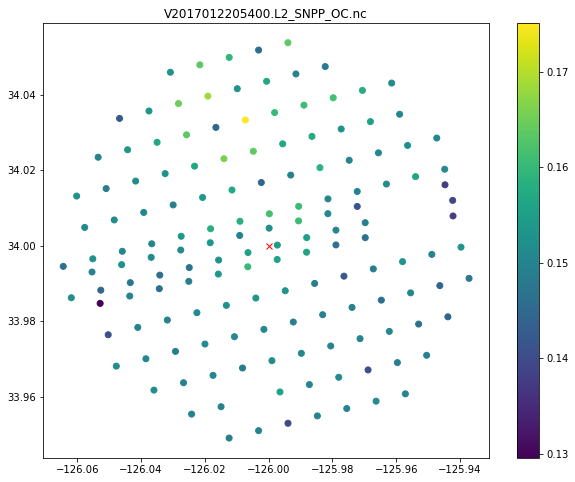

In [21]:
for m in matchup:
    plt.figure(figsize=(10,8))
    plt.title(m.iloc[0].product_name)
    plt.scatter(m.lon, m.lat, c=m.chlor_a)
    plt.plot(track.iloc[0].lon, track.iloc[0].lat, 'rx')
    plt.colorbar()

Let's check the actual data obtained

In [22]:
m

,waypoint_id,lon,lat,dL,dt,aot_862,angstrom,Rrs_410,Rrs_443,Rrs_486,Rrs_551,Rrs_671,chlor_a,chl_ocx,Kd_490,pic,poc,par,l2_flags,product_name
0,0,-125.957130,33.960735,5887,0 days 00:57:59.331000,0.0947,0.0704,0.006340,0.005838,0.004600,0.001432,0.000234,0.150226,0.126508,0.0344,NaN,44.399902,24.553997,1610612992,V2017012205400.L2_SNPP_OC.nc
1,0,-125.966309,33.958794,5530,0 days 00:57:59.331000,0.0881,0.1016,0.006112,0.005748,0.004556,0.001392,0.000178,0.151162,0.123678,0.0336,NaN,43.799805,24.551998,1610612992,V2017012205400.L2_SNPP_OC.nc
2,0,-125.975502,33.956844,5295,0 days 00:57:59.331000,0.0902,0.1133,0.006080,0.005350,0.004404,0.001212,0.000078,0.150281,0.110328,0.0296,NaN,41.000000,24.553997,1610612992,V2017012205400.L2_SNPP_OC.nc
3,0,-125.984711,33.954895,5198,0 days 00:57:59.331000,0.0881,0.0835,0.006248,0.005742,0.004716,0.001336,0.000150,0.150152,0.115467,0.0306,NaN,42.199707,24.553997,1610612992,V2017012205400.L2_SNPP_OC.nc
4,0,-125.993919,33.952942,5249,0 days 00:57:59.331000,0.1663,-0.1231,0.007048,0.006550,0.005276,0.001620,0.000200,0.139565,0.128557,0.0338,0.000012,44.799805,24.599998,536871168,V2017012205400.L2_SNPP_OC.nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0,-125.993942,34.053780,5991,0 days 00:58:01.110000,0.0681,0.1877,0.005302,0.005034,0.004014,0.001380,0.000172,0.163762,0.152688,0.0390,NaN,50.000000,24.507999,1610612736,V2017012205400.L2_SNPP_OC.nc
178,0,-126.003136,34.051826,5756,0 days 00:58:01.110000,0.0616,0.3459,0.004746,0.004500,0.003636,0.001110,0.000074,0.145644,0.127745,0.0336,NaN,44.799805,24.505997,1610612736,V2017012205400.L2_SNPP_OC.nc
179,0,-126.012344,34.049873,5648,0 days 00:58:01.110000,0.0634,0.2351,0.005100,0.004908,0.003814,0.001308,0.000120,0.159272,0.145747,0.0390,NaN,48.600098,24.507999,1610612736,V2017012205400.L2_SNPP_OC.nc
180,0,-126.021553,34.047913,5675,0 days 00:58:01.110000,0.0687,0.1797,0.005034,0.004850,0.003822,0.001334,0.000194,0.163617,0.153221,0.0398,NaN,50.000000,24.509998,1610612736,V2017012205400.L2_SNPP_OC.nc
